#Table of contents
>[Import libraries](#scrollTo=F3FERy0ipRMz)

>[Reading data](#scrollTo=NUtKBiSDpTVO)

>[EDA](#scrollTo=kNzFdXA-pXlz)

>[Tranining model](#scrollTo=_9XBkSL3pfeM)



# Import libraries

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Reading data

Reading data from CSV file

In [2]:
sales_train_df = pd.read_csv('data.csv')

<ipython-input-2-a77cda47633e>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv('data.csv')


In [3]:
sales_train_df.shape

(1017209, 9)

Printing the first 5 rows

In [4]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Printing the unique value of `DayOfWeek` column

# EDA

In [5]:
sales_train_df['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

Printing the unique value of `Open` column

In [6]:
sales_train_df['Open'].unique()

array([1, 0])

Printing the unique value of `Promo` column

In [7]:
sales_train_df['Promo'].unique()

array([1, 0])

Printing the unique value of `StateHoliday` column

In [8]:
sales_train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

Printing the unique value of `SchoolHoliday` column

In [9]:
sales_train_df['SchoolHoliday'].unique()

array([1, 0])

In [10]:
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


Printing the information of data frame

In [11]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Printing the description of data frame

In [12]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [16]:
store_info_df = pd.read_csv('store.csv')

In [17]:
store_info_df.shape

(1115, 10)

In [18]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [19]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [20]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


The code uses Seaborn's 'heatmap' function to create a visual representation of missing (NaN) values in the 'sales_train_df' DataFrame. It displays a color-coded heatmap where missing values are represented by a different color, helping to identify the presence and distribution of missing data in the DataFrame.






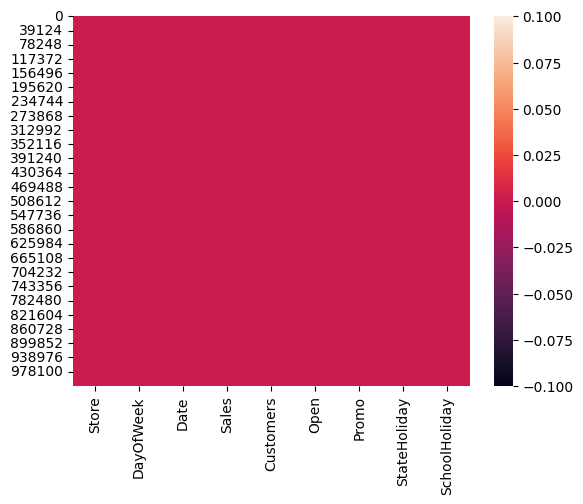

In [21]:
sns.heatmap(sales_train_df.isnull());

In [22]:
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

The code generates histograms for each numerical column in the 'sales_train_df' DataFrame with 30 bins and a red color. The histograms are displayed in a 20x20 figure size, providing an overview of the distribution of each numerical feature.






array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

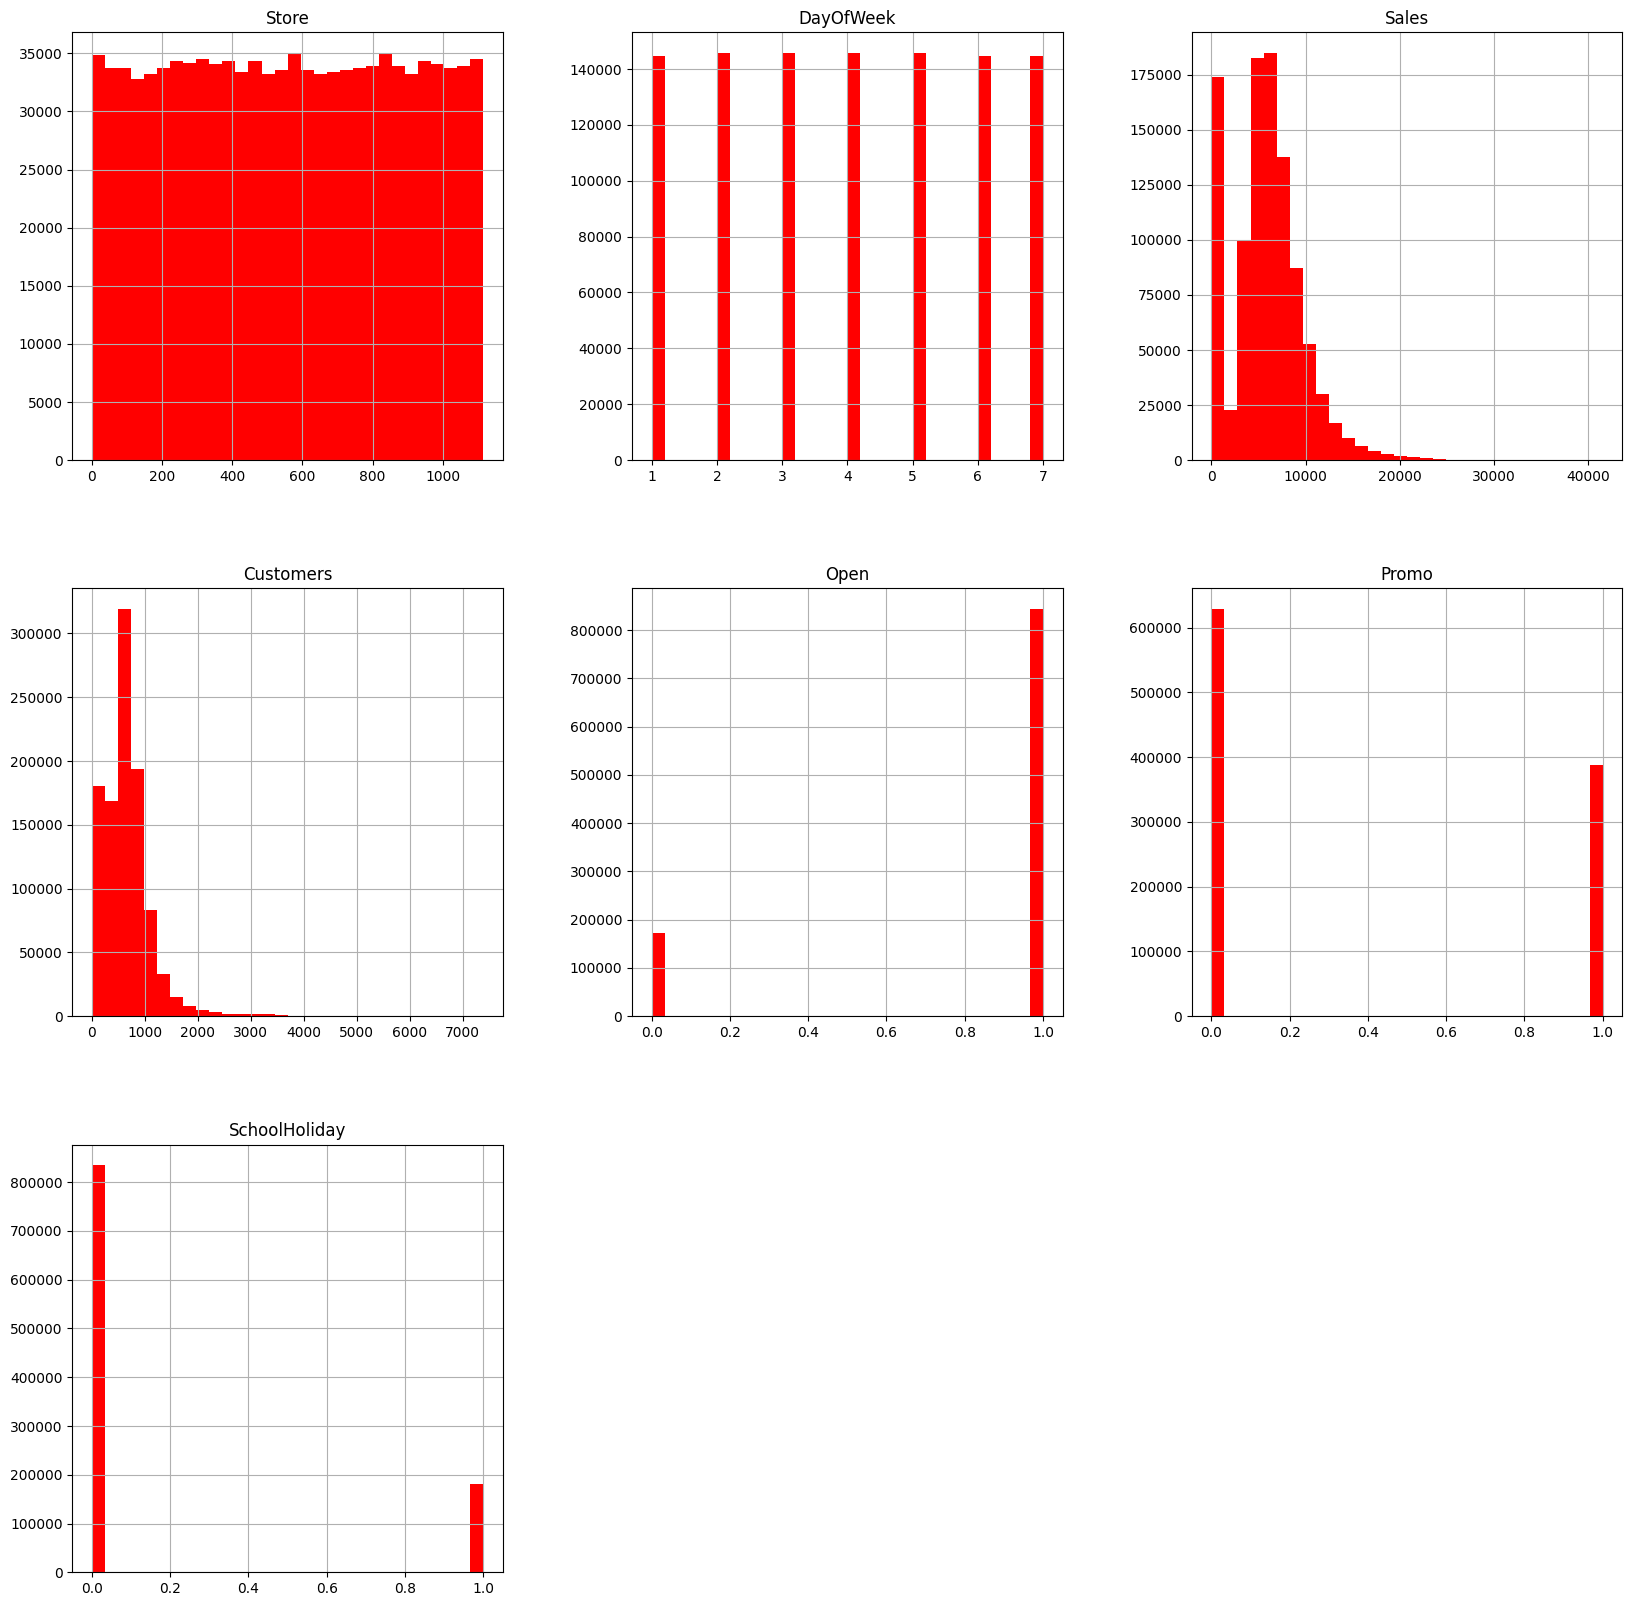

In [23]:
sales_train_df.hist(bins = 30, figsize=(20, 20), color = 'r')

In [24]:
sales_train_df['Customers'].max()

7388

The code creates two new DataFrames: 'closed_train_df' containing rows from 'sales_train_df' where the 'Open' column value is 0, and 'open_train_df' containing rows where the 'Open' column value is 1. This separation is based on whether the stores were closed or open during the recorded sales data.







In [25]:
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [26]:
print('Total = ', len(sales_train_df))
print('Número de lojas/dias fechado = ', len(closed_train_df))
print('Número de lojas/dias aberto = ', len(open_train_df))

Total =  1017209
Número de lojas/dias fechado =  172817
Número de lojas/dias aberto =  844392


In [27]:
172817 / len(store_info_df)

154.99282511210762

In [28]:
closed_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1


The code filters the 'sales_train_df' DataFrame, keeping only the rows where the 'Open' column value is 1. This operation retains data only for the time periods when the stores were open.






In [29]:
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [30]:
sales_train_df.shape

(844392, 9)

In [31]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


The code drops the 'Open' column from the 'sales_train_df' DataFrame in place, removing the column from the DataFrame permanently.






In [32]:
sales_train_df.drop(['Open'], axis = 1, inplace=True)

In [33]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [34]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


The code uses Seaborn's 'heatmap' function to create a visual representation of missing (NaN) values in the 'store_info_df' DataFrame. It displays a color-coded heatmap without the color bar, showing the locations of missing data in the DataFrame.






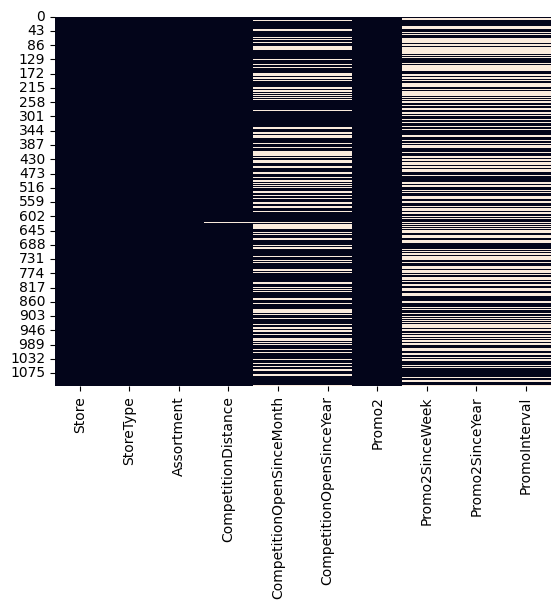

In [35]:
sns.heatmap(store_info_df.isnull(), cbar=False);

The code filters the 'store_info_df' DataFrame to only show rows where the 'CompetitionDistance' column contains missing (NaN) values. This operation displays the rows where the 'CompetitionDistance' information is not available.






In [36]:
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


The code filters the 'store_info_df' DataFrame to only show rows where the 'CompetitionOpenSinceMonth' column contains missing (NaN) values. This operation displays the rows where the information about when the competition opened for the store is not available.






In [37]:
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


The code filters the 'store_info_df' DataFrame to only show rows where the 'CompetitionOpenSinceYear' column contains missing (NaN) values. This operation displays the rows where the information about the year when the competition opened for the store is not available.






In [38]:
store_info_df[store_info_df['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


The code filters the 'store_info_df' DataFrame to only show rows where the 'Promo2' column has a value of 0. This operation displays the rows where the store does not participate in Promo2 (a specific promotional activity).






In [39]:
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


The code fills missing (NaN) values in the specified string columns ('Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth') of the 'store_info_df' DataFrame with the value 0, modifying the DataFrame in place.






In [40]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
  store_info_df[str].fillna(0, inplace=True)

The code uses Seaborn's 'heatmap' function to create a visual representation of missing (NaN) values in the 'store_info_df' DataFrame. It displays a color-coded heatmap without the color bar, showing the locations of missing data in the DataFrame.






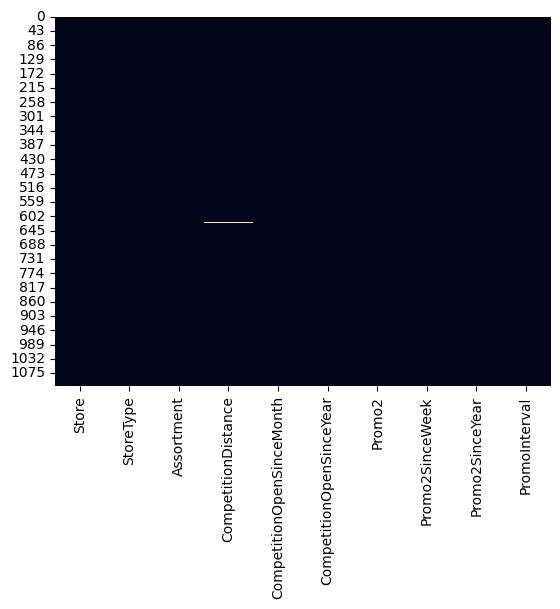

In [41]:
sns.heatmap(store_info_df.isnull(), cbar = False);

The code fills the missing (NaN) values in the 'CompetitionDistance' column of the 'store_info_df' DataFrame with the mean value of the non-missing data in the same column. The DataFrame is modified in place with the updated values.






In [42]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

The code uses Seaborn's 'heatmap' function to create a visual representation of missing (NaN) values in the 'store_info_df' DataFrame. It displays a color-coded heatmap without the color bar, showing the locations of missing data in the DataFrame.






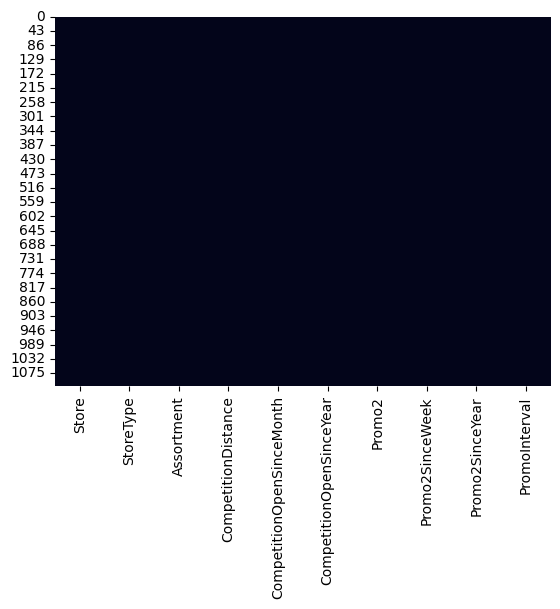

In [43]:
sns.heatmap(store_info_df.isnull(), cbar = False);

The code generates histograms for each numerical column in the 'store_info_df' DataFrame with 30 bins and a red color. The histograms are displayed in a 20x20 figure size, providing an overview of the distribution of each numerical feature.






array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

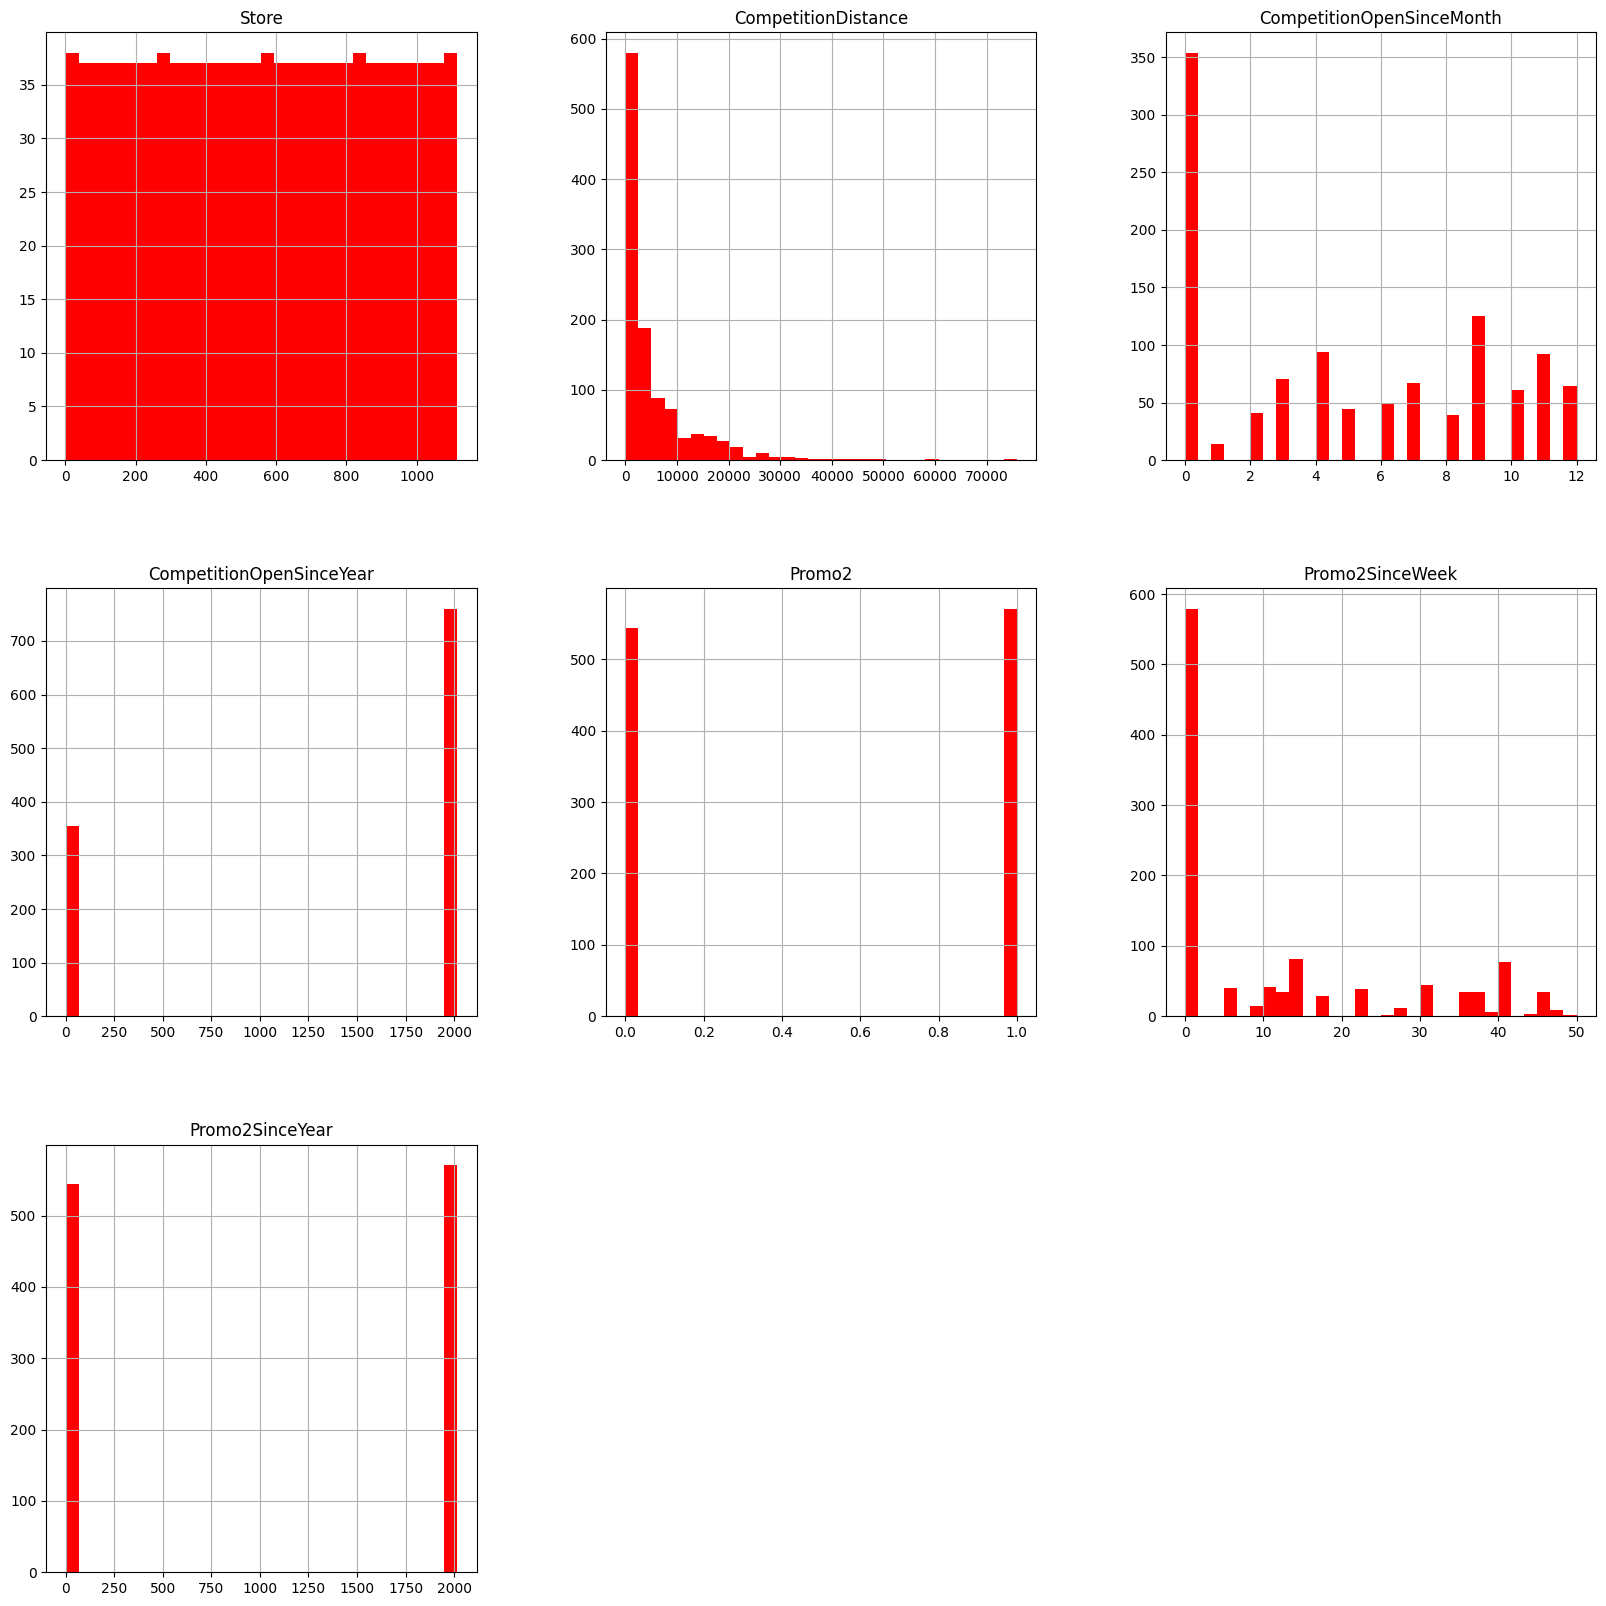

In [44]:
store_info_df.hist(bins = 30, figsize=(20,20), color = 'r')

In [45]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [46]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


The code performs an inner join on the 'sales_train_df' and 'store_info_df' DataFrames based on the common 'Store' column, creating a new DataFrame 'sales_train_all_df' that combines the sales data and store information. The resulting DataFrame contains only the rows where there is a match between 'Store' columns in both DataFrames.






In [47]:
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')

In [48]:
sales_train_all_df.shape

(844392, 17)

In [49]:
sales_train_all_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844391,292,3,2013-01-02,5076,672,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


The code calculates the correlation matrix for the 'sales_train_all_df' DataFrame, representing the pairwise correlations between its numerical columns. It then creates a heatmap using Seaborn's 'heatmap' function to visualize these correlations, annotating the heatmap with the correlation values. The figure size is set to 20x20 for better visibility.






<ipython-input-50-d2d32c3413e7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = sales_train_all_df.corr()


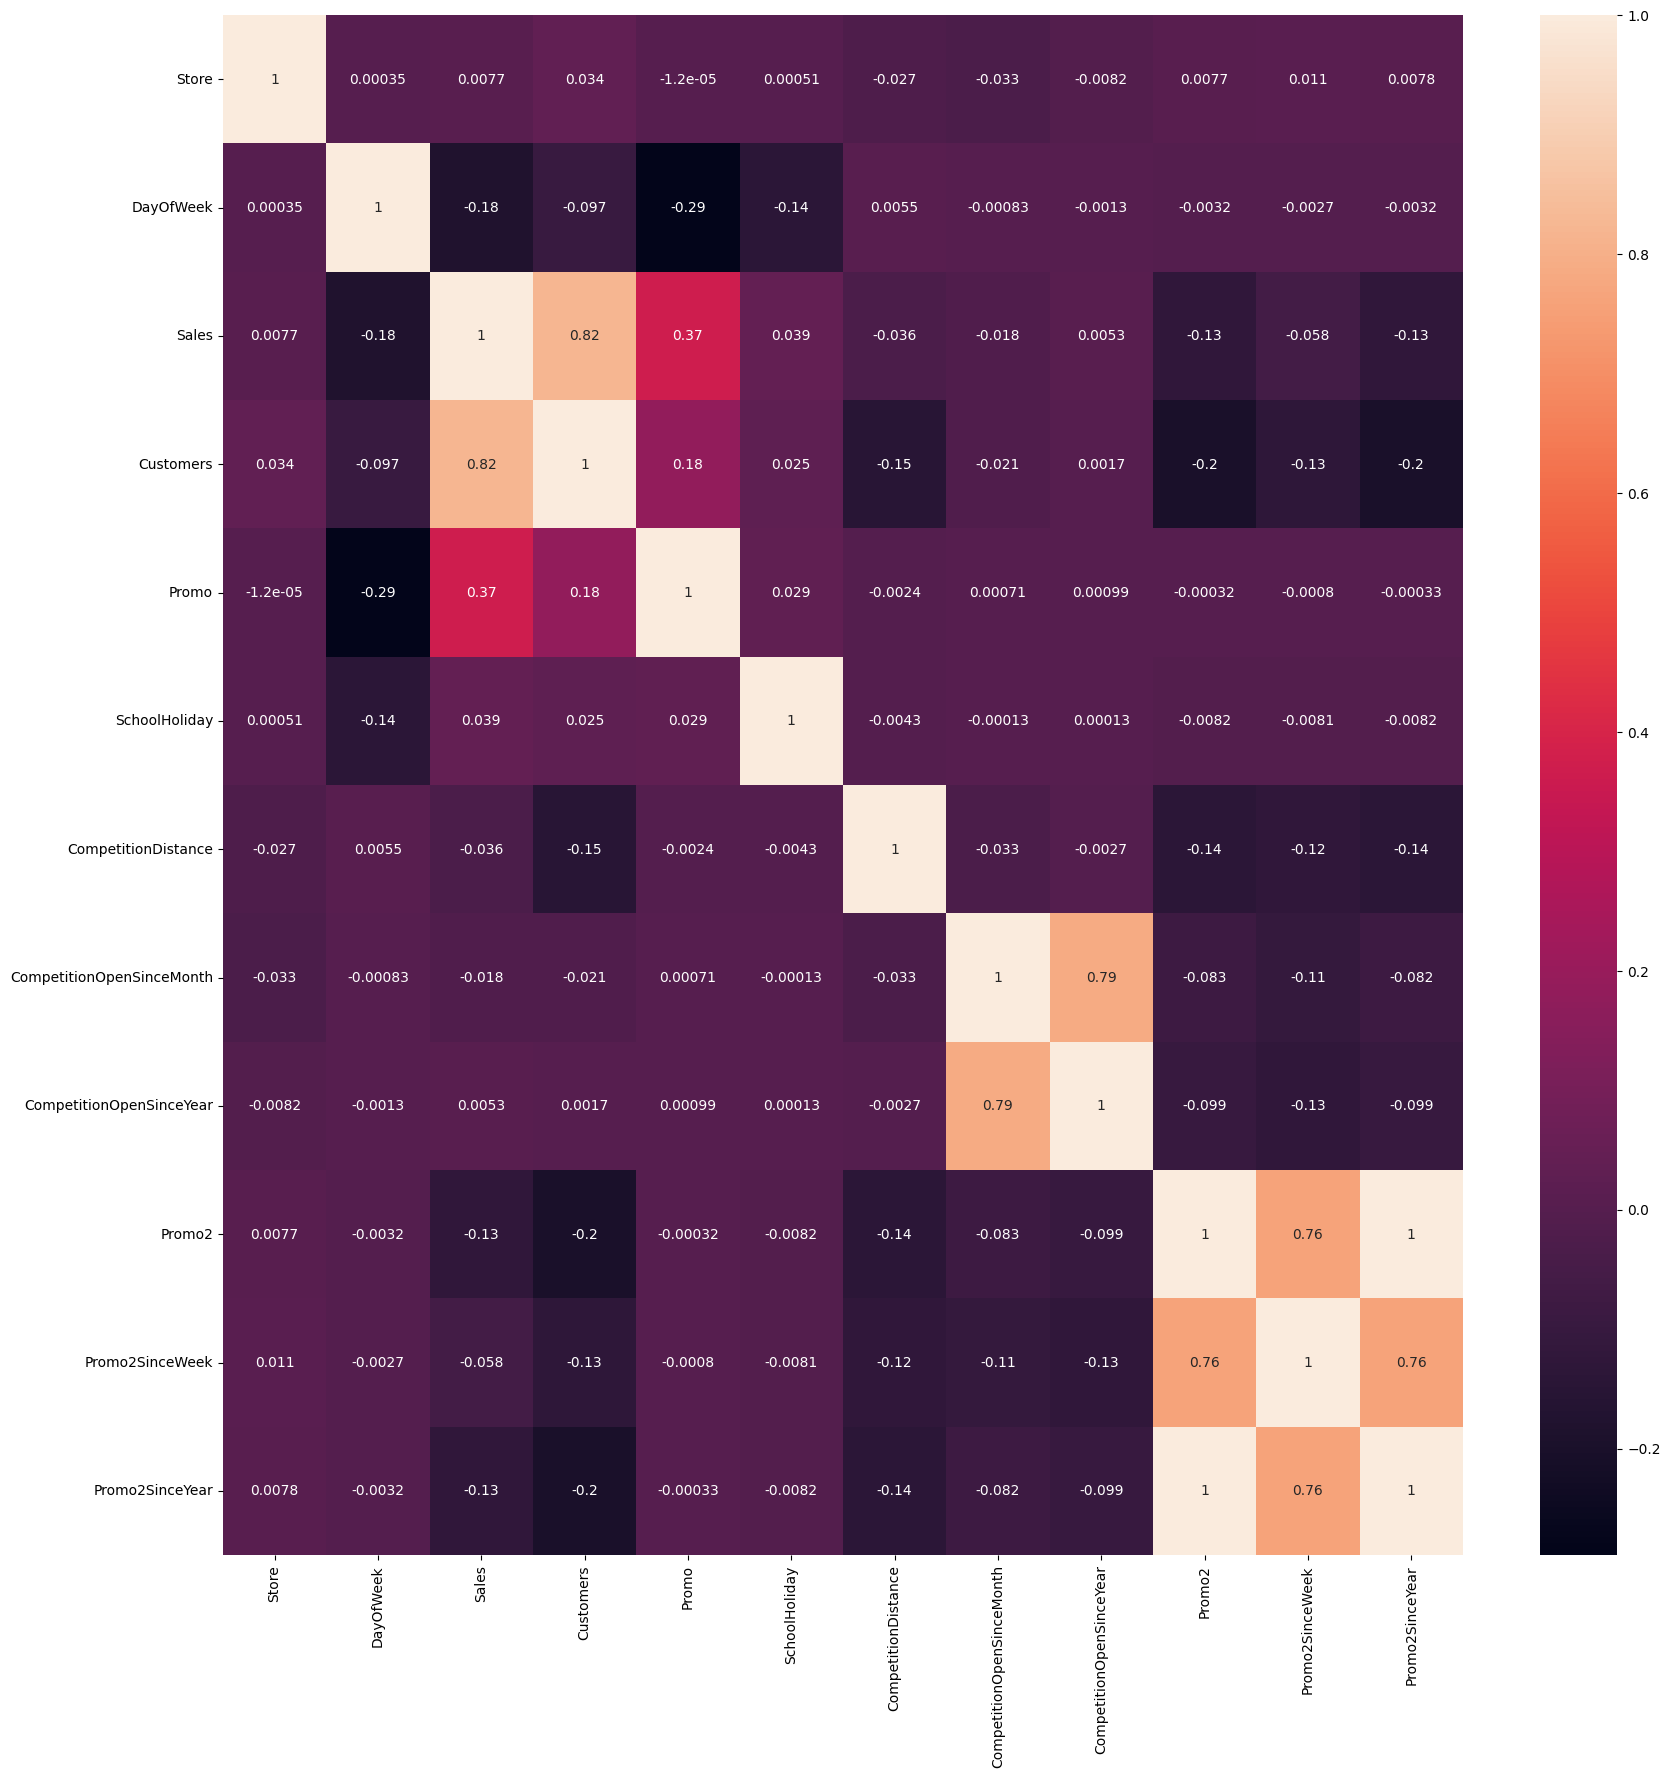

In [50]:
correlations = sales_train_all_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot = True);

The code computes the correlation of the 'Sales' column with all other columns in the 'sales_train_all_df' DataFrame and then sorts the correlations in ascending order. It displays the correlations, showing the strength and direction of the relationship between the 'Sales' column and each other column in the DataFrame.






In [51]:
correlations = sales_train_all_df.corr()['Sales'].sort_values()
correlations

<ipython-input-51-9799edb1fa67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = sales_train_all_df.corr()['Sales'].sort_values()


DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

The code extracts the year from the 'Date' column in the 'sales_train_all_df' DataFrame and creates a new column named 'Year' to store these year values. This operation allows for easier analysis and grouping of data based on the year of the sales transactions.






In [52]:
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year

In [53]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015


The code extracts the month and day from the 'Date' column in the 'sales_train_all_df' DataFrame and creates two new columns named 'Month' and 'Day' to store these values, respectively. This operation facilitates further analysis and grouping of data based on the month and day of the sales transactions.






In [54]:
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [55]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


The code groups the data in the 'sales_train_all_df' DataFrame by the 'Month' column, calculates the average sales for each month, and then plots these average sales values against the months. It creates a line plot with red markers and sets the title of the plot as 'Média de vendas por mês' (Mean sales per month).






Text(0.5, 1.0, 'Média de vendas por mês')

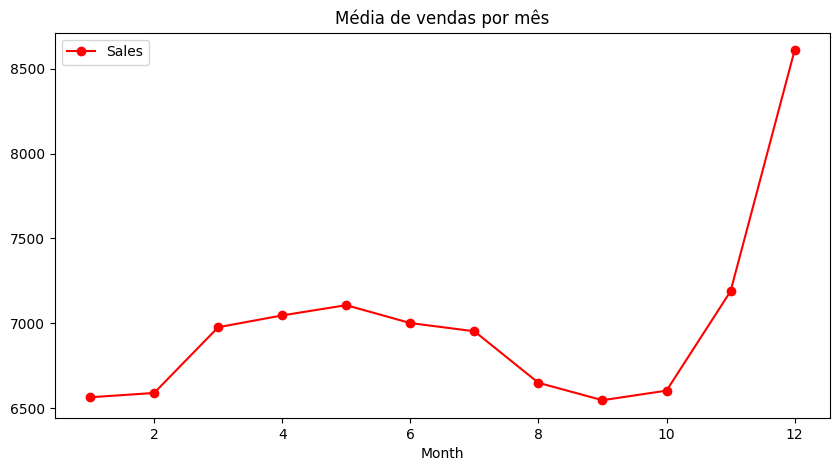

In [56]:
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por mês')

The code groups the data in the 'sales_train_all_df' DataFrame by the 'Month' column, calculates the average number of customers for each month, and then plots these average customer values against the months. It creates a line plot with blue triangles as markers and sets the title of the plot as 'Média de clientes por mês' (Mean customers per month).






Text(0.5, 1.0, 'Média de clientes por mês')

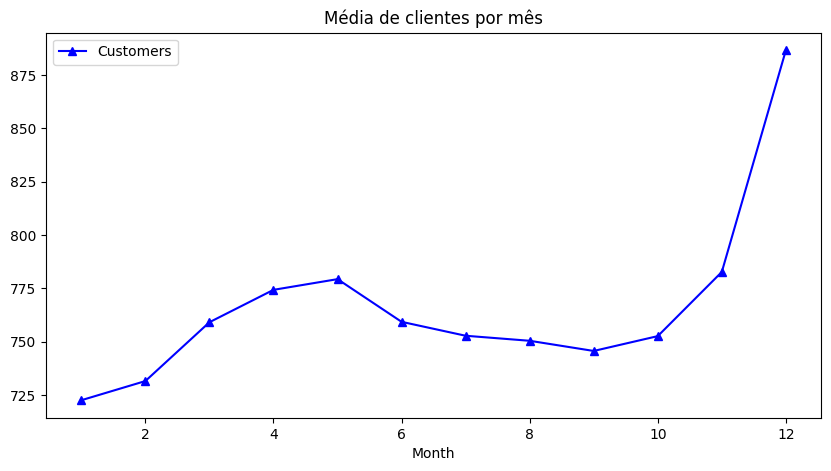

In [58]:
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por mês')

The code groups the data in the 'sales_train_all_df' DataFrame by the 'Day' column, calculates the average sales for each day, and then plots these average sales values against the days. It creates a line plot with red markers and sets the title of the plot as 'Média de vendas por dia' (Mean sales per day).






Text(0.5, 1.0, 'Média de vendas por dia')

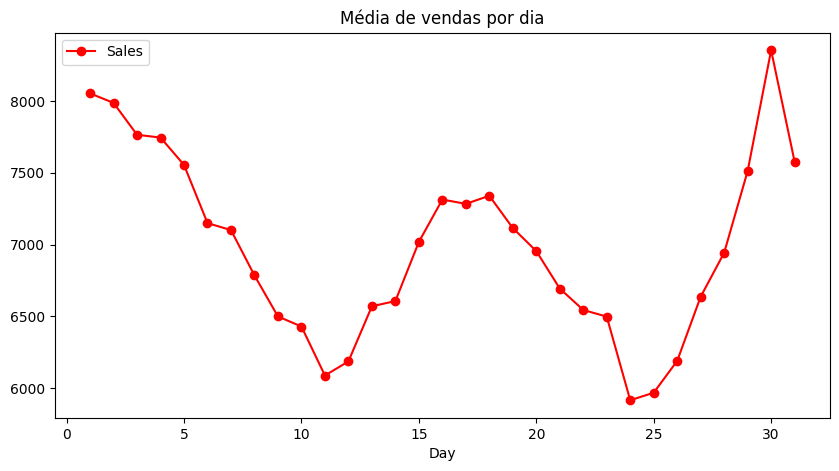

In [59]:
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia')

The code groups the data in the 'sales_train_all_df' DataFrame by the 'Day' column, calculates the average number of customers for each day, and then plots these average customer values against the days. It creates a line plot with blue triangles as markers and sets the title of the plot as 'Média de clientes por dia' (Mean customers per day).






Text(0.5, 1.0, 'Média de clientes por dia')

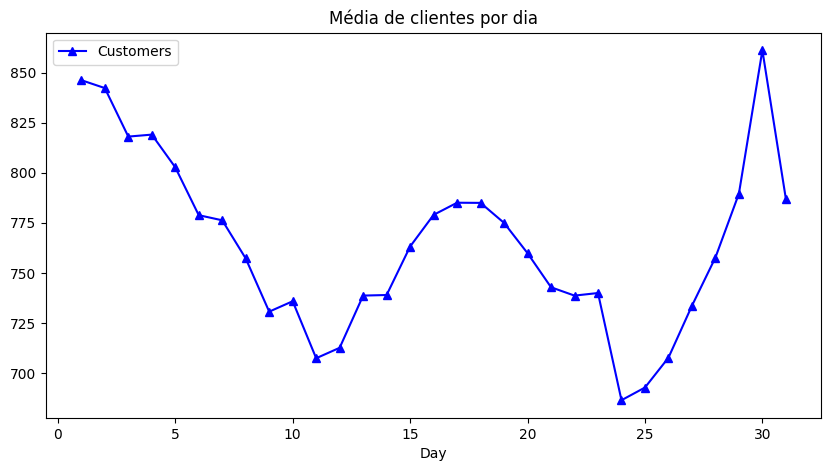

In [60]:
axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia')

The code groups the data in the 'sales_train_all_df' DataFrame by the 'DayOfWeek' column, calculates the average sales for each day of the week, and then plots these average sales values against the days of the week. It creates a line plot with red markers and sets the title of the plot as 'Média de vendas por dia da semana' (Mean sales per day of the week).






Text(0.5, 1.0, 'Média de vendas por dia da semana')

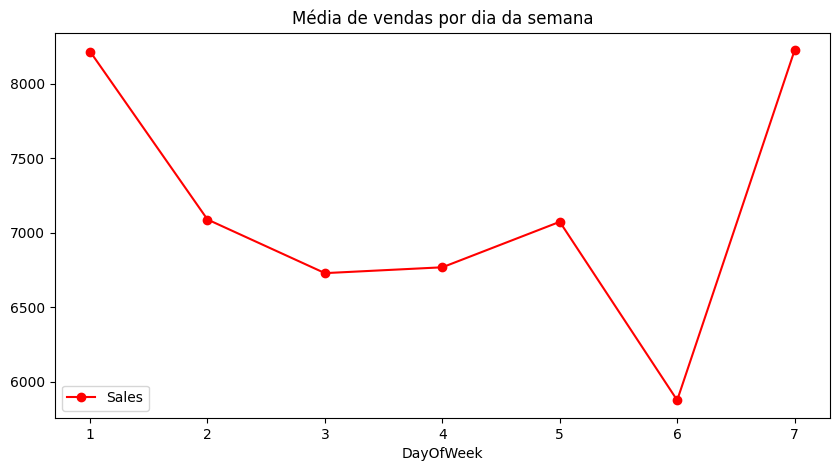

In [61]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia da semana')

The code groups the data in the 'sales_train_all_df' DataFrame by the 'DayOfWeek' column, calculates the average number of customers for each day of the week, and then plots these average customer values against the days of the week. It creates a line plot with blue triangles as markers and sets the title of the plot as 'Média de clientes por dia da semana' (Mean customers per day of the week).






Text(0.5, 1.0, 'Média de clientes por dia da semana')

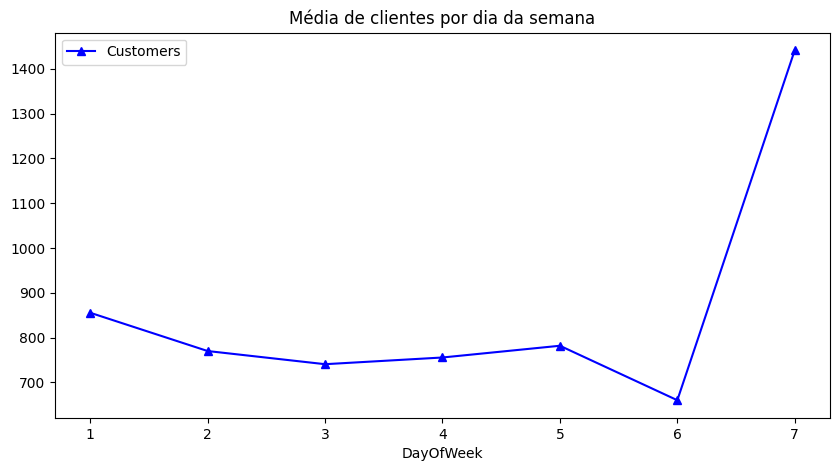

In [62]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia da semana')

The code creates a plot using the 'matplotlib' library to visualize the average sales ('Sales') for each date, grouped by the different store types ('StoreType') in the 'sales_train_all_df' DataFrame. The resulting plot displays the trend of sales for each store type over time.






<ipython-input-63-7b8dae65d74b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)


<Axes: xlabel='Date'>

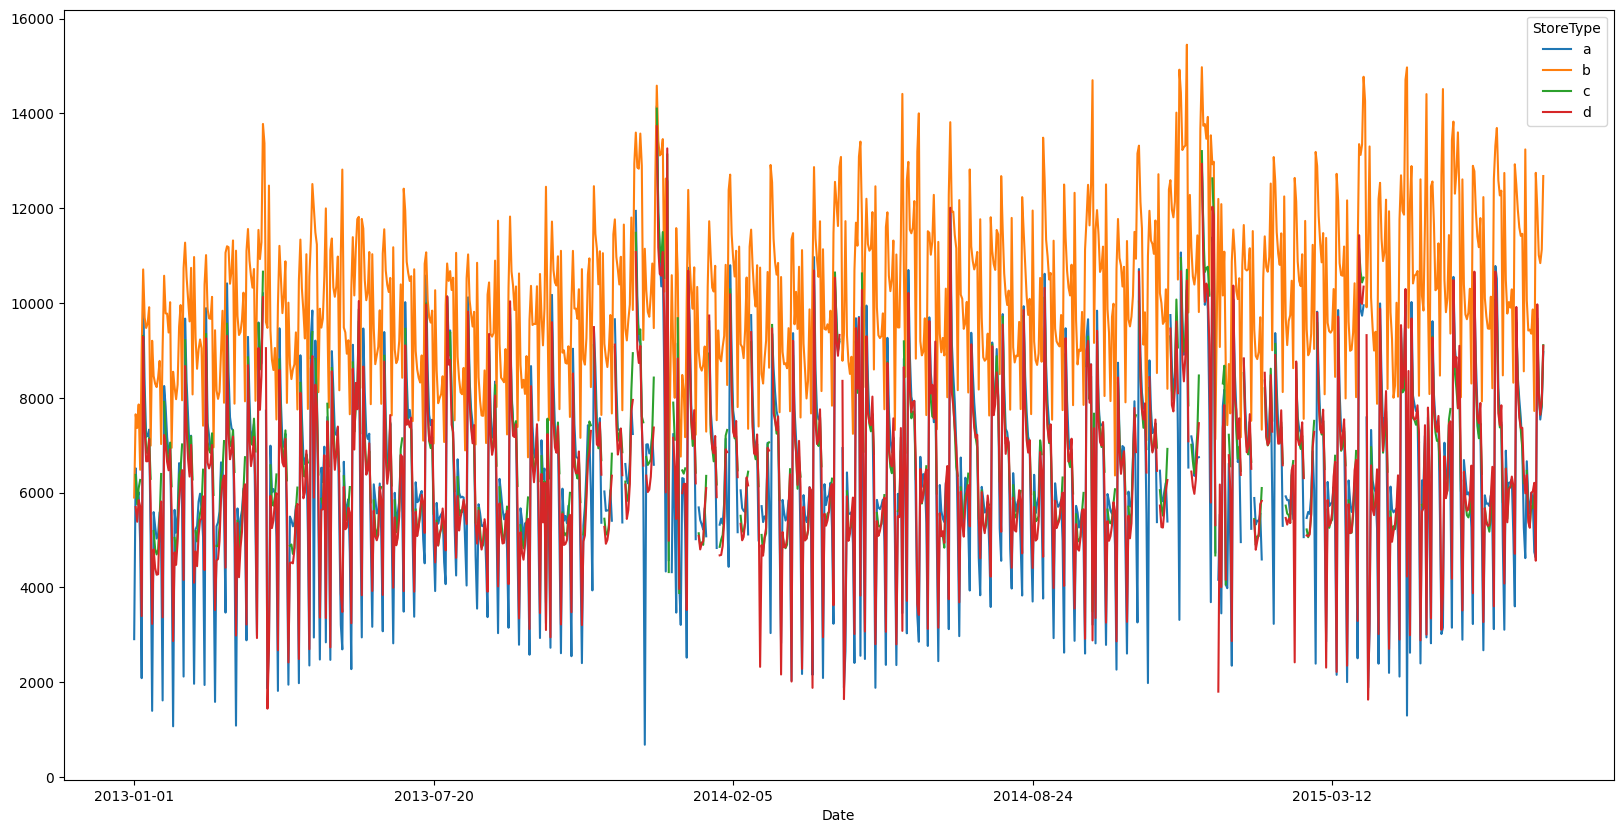

In [63]:
fig, ax = plt.subplots(figsize = (20,10))
sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

The code uses Seaborn's 'barplot' function to create a bar plot that shows the average sales ('Sales') for each value of the 'Promo' column in the 'sales_train_all_df' DataFrame. The plot provides a visual comparison of the average sales with and without promotions.






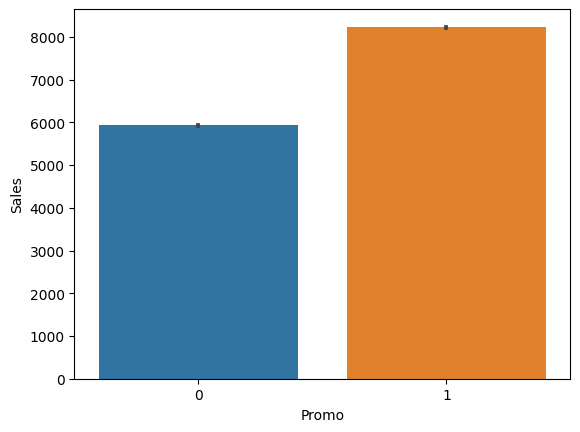

In [64]:
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all_df);

This code uses Seaborn to create a bar plot, where the x-axis represents the 'Promo' variable and the y-axis represents the 'Customers' variable from the 'sales_train_all_df' dataset. The plot shows the average number of customers for each promo category.






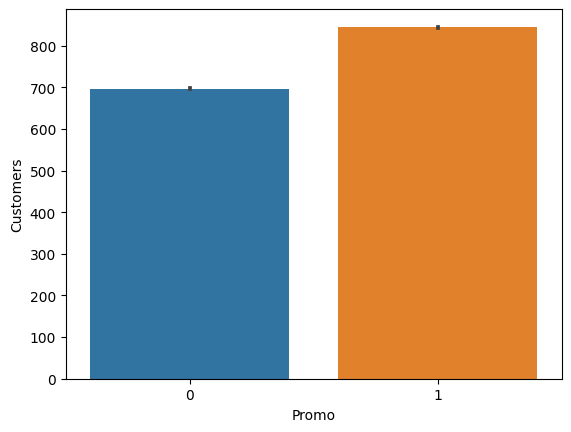

In [65]:
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df);

## Treinamento do modelo - parte 1

In [66]:
!pip install prophet

In [67]:
from prophet import Prophet

This code defines a function called sales_prediction that takes a store ID, sales data, and the number of forecast periods as input. It uses the Facebook Prophet library to fit a time series model to the sales data, make future predictions, and then plots the forecast and its components (trend, seasonality, and holidays). The function returns the original sales data and the forecast.






#Tranining model

In [68]:
# Date: ds
# Sales: y
def sales_prediction(store_id, sales_df, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

This code calls the sales_prediction function with the store ID 10, the sales data sales_train_all_df, and 60 periods to forecast. It stores the original sales data in df_origin and the forecast results in df_prediction.






INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuif2i46y/kxozami6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuif2i46y/yo3ljpy3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44655', 'data', 'file=/tmp/tmpuif2i46y/kxozami6.json', 'init=/tmp/tmpuif2i46y/yo3ljpy3.json', 'output', 'file=/tmp/tmpuif2i46y/prophet_modelg8nrlpac/prophet_model-20230724095207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:52:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:52:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


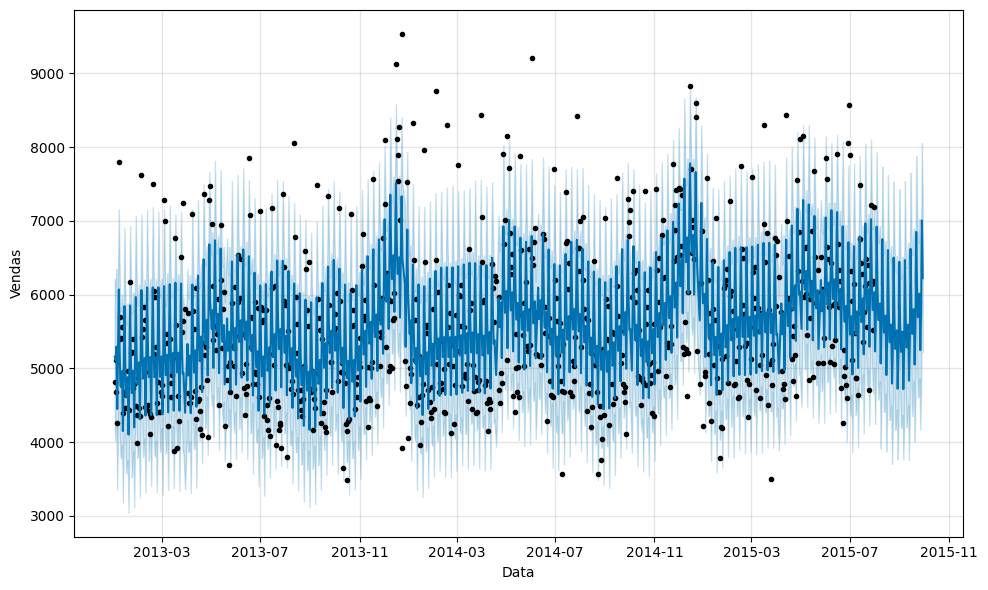

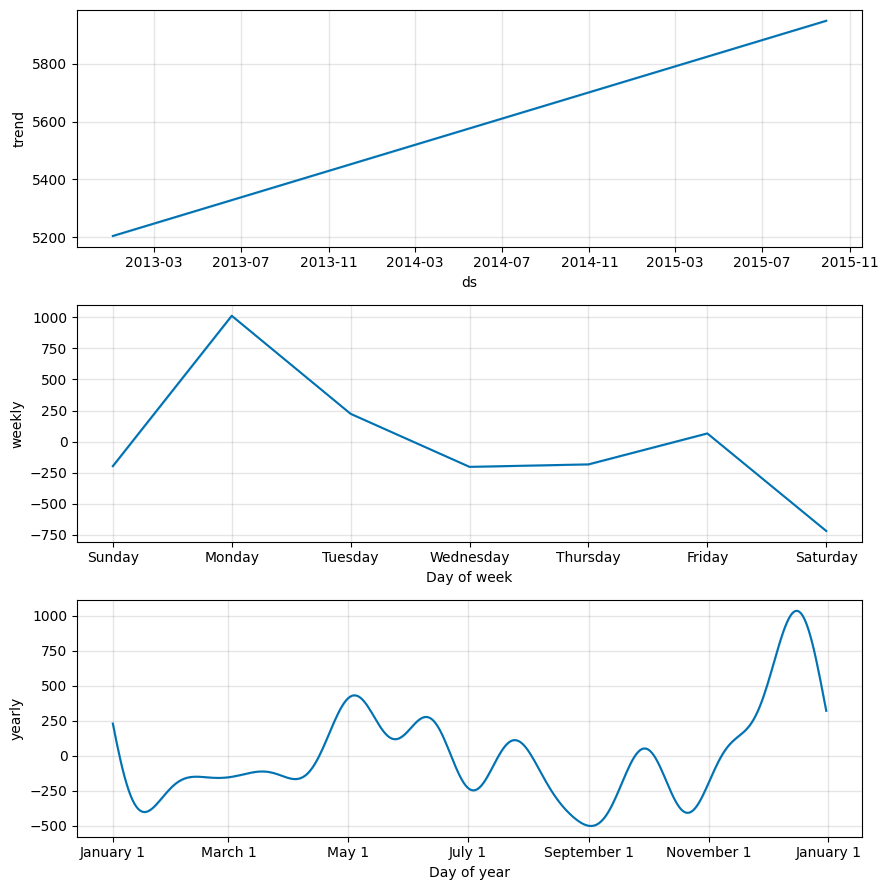

In [69]:
df_origin, df_prediction = sales_prediction(10, sales_train_all_df, 60)

In [70]:
df_origin.shape, df_prediction.shape

((784, 2), (844, 19))

In [71]:
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5204.486658,4165.200027,6213.337513,5204.486658,5204.486658,-43.902335,-43.902335,-43.902335,-203.049769,-203.049769,-203.049769,159.147434,159.147434,159.147434,0.0,0.0,0.0,5160.584323
1,2013-01-03,5205.230730,4016.763121,6146.466691,5205.230730,5205.230730,-93.003041,-93.003041,-93.003041,-183.141466,-183.141466,-183.141466,90.138426,90.138426,90.138426,0.0,0.0,0.0,5112.227689
2,2013-01-04,5205.974802,4279.508515,6350.721731,5205.974802,5205.974802,90.019950,90.019950,90.019950,65.957031,65.957031,65.957031,24.062919,24.062919,24.062919,0.0,0.0,0.0,5295.994752
3,2013-01-05,5206.718874,3357.021276,5569.938340,5206.718874,5206.718874,-757.470619,-757.470619,-757.470619,-719.018375,-719.018375,-719.018375,-38.452244,-38.452244,-38.452244,0.0,0.0,0.0,4449.248255
4,2013-01-07,5208.207018,4974.972039,7157.472437,5208.207018,5208.207018,862.164867,862.164867,862.164867,1012.862453,1012.862453,1012.862453,-150.697586,-150.697586,-150.697586,0.0,0.0,0.0,6070.371885


In [72]:
df_prediction.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
784,2015-08-01,5905.001137,4245.743417,6305.826628,5905.001137,5905.001137,-673.953022,-673.953022,-673.953022,-719.018375,-719.018375,-719.018375,45.065353,45.065353,45.065353,0.0,0.0,0.0,5231.048115
785,2015-08-02,5905.745667,4718.711215,6790.696866,5905.745667,5905.745667,-172.686247,-172.686247,-172.686247,-197.385833,-197.385833,-197.385833,24.699586,24.699586,24.699586,0.0,0.0,0.0,5733.059420
786,2015-08-03,5906.490196,5857.008183,7937.086026,5906.490196,5906.490196,1015.438492,1015.438492,1015.438492,1012.862453,1012.862453,1012.862453,2.576039,2.576039,2.576039,0.0,0.0,0.0,6921.928688
787,2015-08-04,5907.234726,5074.529201,7064.123430,5907.234726,5907.234726,202.830805,202.830805,202.830805,223.775958,223.775958,223.775958,-20.945153,-20.945153,-20.945153,0.0,0.0,0.0,6110.065531
788,2015-08-05,5907.979256,4576.544658,6704.264817,5907.979256,5907.979256,-248.556855,-248.556855,-248.556855,-203.049769,-203.049769,-203.049769,-45.507086,-45.507086,-45.507086,0.0,0.0,0.0,5659.422401
789,2015-08-06,5908.723785,4664.573660,6785.758661,5908.723785,5908.723785,-253.906331,-253.906331,-253.906331,-183.141466,-183.141466,-183.141466,-70.764864,-70.764864,-70.764864,0.0,0.0,0.0,5654.817455
790,2015-08-07,5909.468315,4825.474151,6928.623712,5909.468315,5909.468315,-30.436427,-30.436427,-30.436427,65.957031,65.957031,65.957031,-96.393458,-96.393458,-96.393458,0.0,0.0,0.0,5879.031888
791,2015-08-08,5910.212845,3915.374084,6134.954980,5910.212845,5910.212845,-841.112806,-841.112806,-841.112806,-719.018375,-719.018375,-719.018375,-122.094432,-122.094432,-122.094432,0.0,0.0,0.0,5069.100038
792,2015-08-09,5910.957375,4504.978487,6631.085770,5910.957372,5910.957375,-344.987201,-344.987201,-344.987201,-197.385833,-197.385833,-197.385833,-147.601368,-147.601368,-147.601368,0.0,0.0,0.0,5565.970174
793,2015-08-10,5911.701904,5627.102305,7735.058205,5911.701895,5911.701907,840.178570,840.178570,840.178570,1012.862453,1012.862453,1012.862453,-172.683883,-172.683883,-172.683883,0.0,0.0,0.0,6751.880474


In [73]:
df_prediction.tail(60).to_csv('previsoes_vendas.csv')

In [74]:
df_origin.tail()

,ds,y
7040,2015-07-27,7212
7039,2015-07-28,6140
7038,2015-07-29,5524
7037,2015-07-30,6186
7036,2015-07-31,7185


This code is an updated version of the previous sales_prediction function, which now accepts an additional parameter holidays. It uses the Prophet library to forecast sales for a specific store (given by store_id) based on the sales data sales_df and considering the specified holidays. The original sales data is stored in sales_df, and the forecast results are stored in forecast.






In [75]:
def sales_prediction(store_id, sales_df, holidays, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  model = Prophet(holidays=holidays)
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

In [76]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


This code filters the rows in the sales_train_all_df DataFrame where SchoolHoliday is equal to 1, then selects only the Date column values for those rows and stores them in the school_holidays array. The .shape attribute is used to get the shape (number of elements) of the school_holidays array.






In [77]:
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [78]:
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [79]:
len(np.unique(school_holidays))

477

This code filters the rows in the sales_train_all_df DataFrame where the StateHoliday column has values 'a', 'b', or 'c', then selects only the Date column values for those rows and stores them in the state_holidays array.






In [80]:
state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday'] == 'a') |
                                    (sales_train_all_df['StateHoliday'] == 'b') |
                                    (sales_train_all_df['StateHoliday'] == 'c')].loc[:,'Date'].values

In [81]:
state_holidays.shape

(910,)

In [82]:
len(np.unique(state_holidays))

35

This code converts the state_holidays array of dates into a DataFrame with a 'ds' column containing the dates as datetime objects and a 'holiday' column with the value 'state_holiday' for each row. The resulting DataFrame is then displayed.






In [83]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})
state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
905,2013-04-01,state_holiday
906,2013-08-15,state_holiday
907,2015-06-04,state_holiday
908,2014-06-19,state_holiday


This code converts the school_holidays array of dates into a DataFrame with a 'ds' column containing the dates as datetime objects and a 'holiday' column with the value 'school_holiday' for each row. The resulting DataFrame is then displayed.






In [84]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                               'holiday': 'school_holiday'})
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


This code concatenates the state_holidays and school_holidays DataFrames vertically into a new DataFrame called school_state_holidays.






In [85]:
school_state_holidays = pd.concat((state_holidays, school_holidays))
school_state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


This code uses the sales_prediction function to forecast sales for store_id=10 in the sales_train_all_df DataFrame, considering school_state_holidays as holidays, and predicting sales for the next 5 periods. The original sales data is stored in df_original, and the forecasted results are stored in df_prediction.






INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuif2i46y/qkv_ah7h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuif2i46y/4sx1jwb3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14972', 'data', 'file=/tmp/tmpuif2i46y/qkv_ah7h.json', 'init=/tmp/tmpuif2i46y/4sx1jwb3.json', 'output', 'file=/tmp/tmpuif2i46y/prophet_modelm4vsr_m5/prophet_model-20230724095329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:53:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


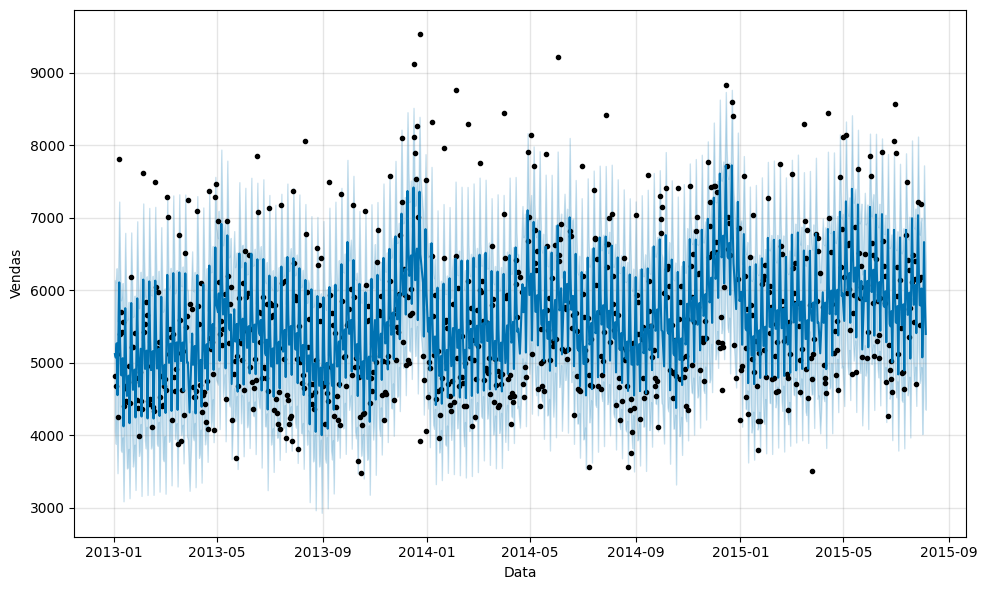

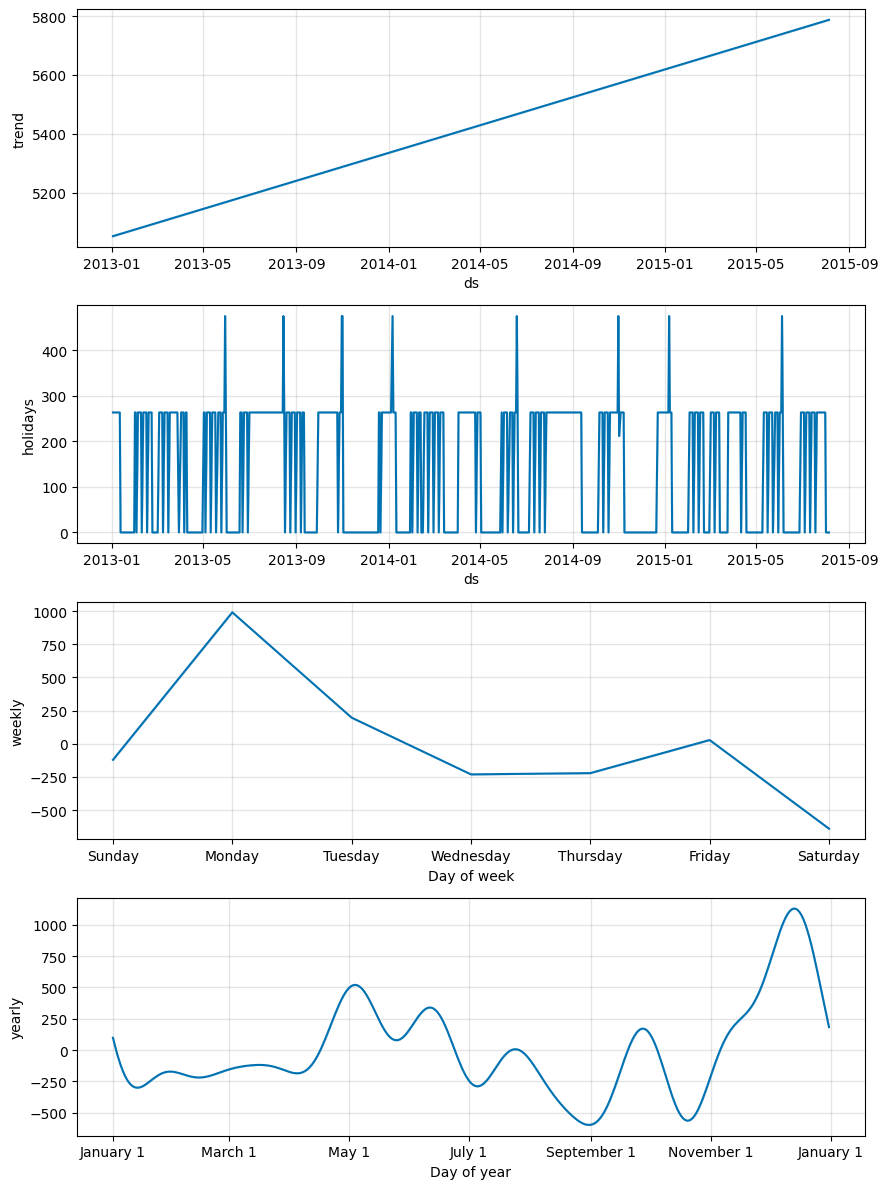

In [86]:
df_original, df_prediction = sales_prediction(10, sales_train_all_df, school_state_holidays, 5)

In [87]:
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5052.876990,4055.610786,6139.686419,5052.876990,5052.876990,66.803519,66.803519,66.803519,263.600799,...,-231.215361,-231.215361,-231.215361,34.418082,34.418082,34.418082,0.0,0.0,0.0,5119.680509
1,2013-01-03,5053.653929,3882.995027,6109.063633,5053.653929,5053.653929,17.678310,17.678310,17.678310,263.600799,...,-221.732238,-221.732238,-221.732238,-24.190251,-24.190251,-24.190251,0.0,0.0,0.0,5071.332238
2,2013-01-04,5054.430868,4246.220126,6302.818936,5054.430868,5054.430868,213.828749,213.828749,213.828749,263.600799,...,27.776078,27.776078,27.776078,-77.548128,-77.548128,-77.548128,0.0,0.0,0.0,5268.259617
3,2013-01-05,5055.207807,3477.372129,5575.168268,5055.207807,5055.207807,-502.107757,-502.107757,-502.107757,263.600799,...,-640.411806,-640.411806,-640.411806,-125.296750,-125.296750,-125.296750,0.0,0.0,0.0,4553.100049
4,2013-01-07,5056.761684,5067.806455,7222.364103,5056.761684,5056.761684,1051.038525,1051.038525,1051.038525,263.600799,...,990.568234,990.568234,990.568234,-203.130508,-203.130508,-203.130508,0.0,0.0,0.0,6107.800210
